In [20]:
"Student Name: Kaiwen Suo/Student ID: 1005764816/ Course code: INF2178/ Date: Feb,3,2024"
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy import stats

In [21]:
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/INF2178_A1_data.xlsx')
df.info() # show dataset structure
df.head() # display few details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [22]:
# Calculate occupancy rates
df['OCCUPANCY_RATE_BED'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']
df['OCCUPANCY_RATE_ROOM'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM']

# Drop rows of NaN to prepare clean dataset
cleaned_df = df.dropna(subset=['OCCUPANCY_RATE_BED', 'OCCUPANCY_RATE_ROOM'], how='all')

# dispaly few EDA of Occupancy rate of bed and Occupancy rate of room
cleaned_df[['OCCUPANCY_RATE_BED', 'OCCUPANCY_RATE_ROOM']].describe()


,OCCUPANCY_RATE_BED,OCCUPANCY_RATE_ROOM
count,32399.000000,18545.000000
mean,0.927885,0.934087
std,0.122562,0.163241
min,0.022727,0.012048
25%,0.900000,0.958333
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.014085


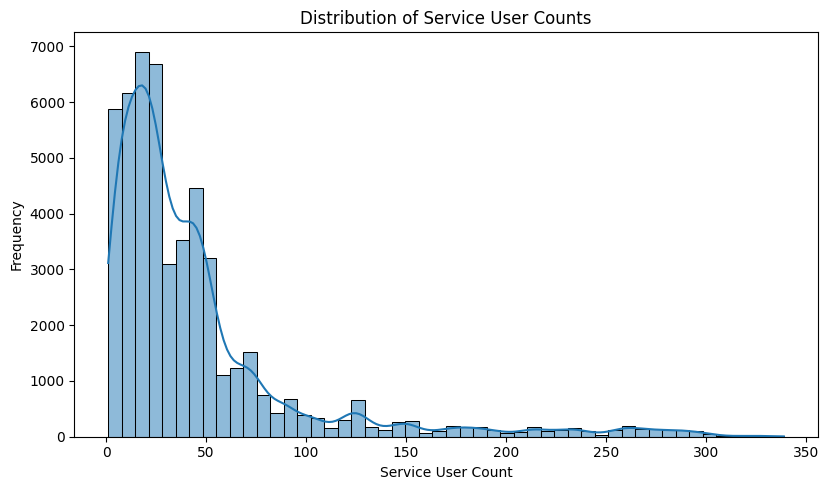

In [52]:
# Conduct Detail EDA for dataset
# Set up figure
plt.figure(figsize=(16, 5))

# Distribution of Service User Counts
plt.subplot(1, 2, 1)
sns.histplot(data=cleaned_df, x='SERVICE_USER_COUNT', bins=50, kde=True)
plt.title('Distribution of Service User Counts')
plt.xlabel('Service User Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


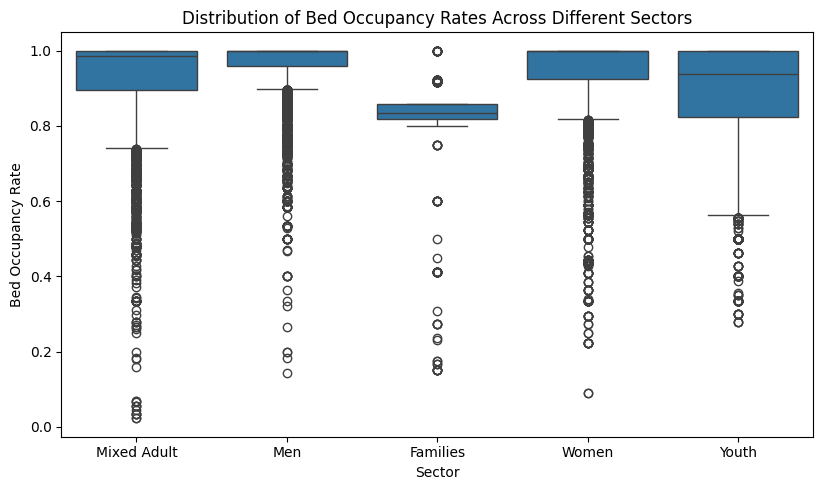

In [39]:
# Distribution of Bed Occupancy Rates across Different Sectors
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_df.dropna(subset=['OCCUPANCY_RATE_BED']), x='SECTOR', y='OCCUPANCY_RATE_BED')
plt.title('Distribution of Bed Occupancy Rates Across Different Sectors')
plt.xlabel('Sector')
plt.ylabel('Bed Occupancy Rate')

plt.tight_layout()
plt.show()

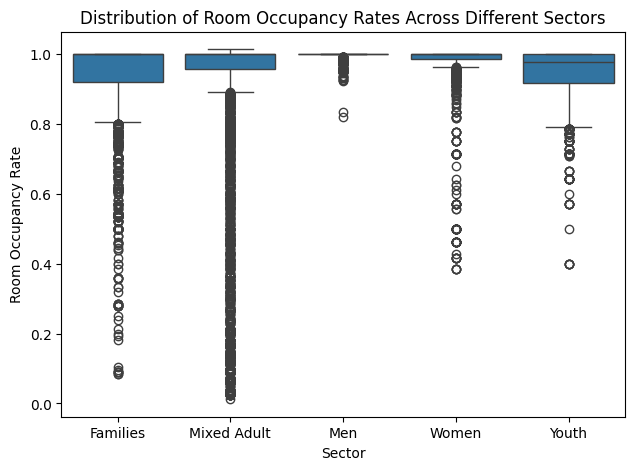

In [45]:
# Distribution of Room Occupancy Rates across Different Sectors
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_df.dropna(subset=['OCCUPANCY_RATE_ROOM']), x='SECTOR', y='OCCUPANCY_RATE_ROOM')
plt.title('Distribution of Room Occupancy Rates Across Different Sectors')
plt.xlabel('Sector')
plt.ylabel('Room Occupancy Rate')

plt.show()


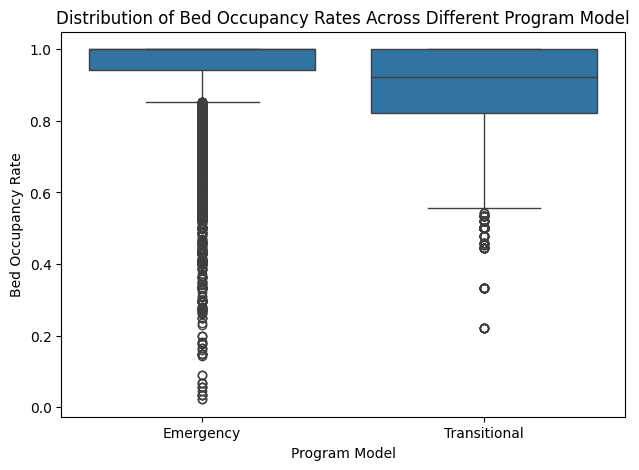

In [44]:
# Distribution of Bed Occupancy Rates across Different Program Model
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_df.dropna(subset=['OCCUPANCY_RATE_BED']), x='PROGRAM_MODEL', y='OCCUPANCY_RATE_BED')
plt.title('Distribution of Bed Occupancy Rates Across Different Program Model')
plt.xlabel('Program Model')
plt.ylabel('Bed Occupancy Rate')

plt.show()


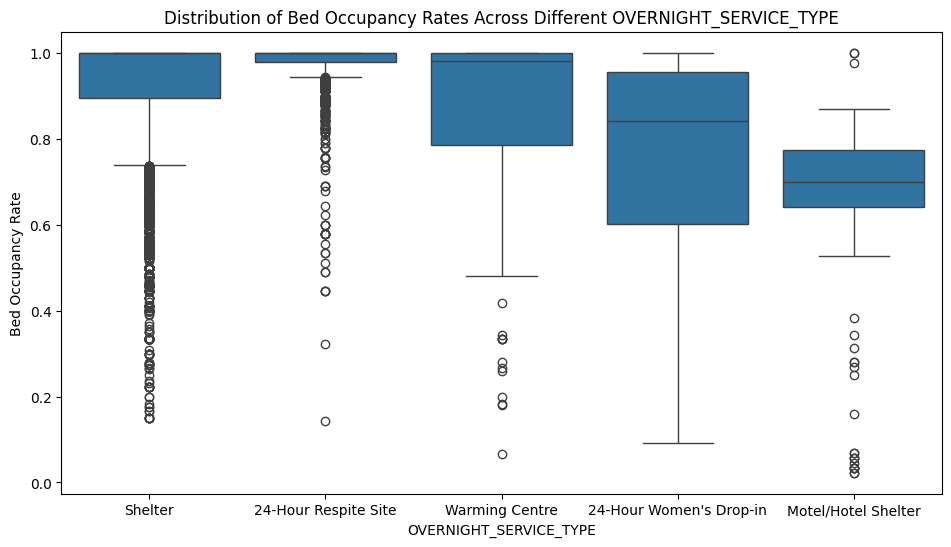

In [46]:
# Distribution of Bed Occupancy Rates across Different OVERNIGHT_SERVICE_TYPE
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_df.dropna(subset=['OCCUPANCY_RATE_BED']), x='OVERNIGHT_SERVICE_TYPE', y='OCCUPANCY_RATE_BED')
plt.title('Distribution of Bed Occupancy Rates Across Different OVERNIGHT_SERVICE_TYPE')
plt.xlabel('OVERNIGHT_SERVICE_TYPE')
plt.ylabel('Bed Occupancy Rate')

plt.show()

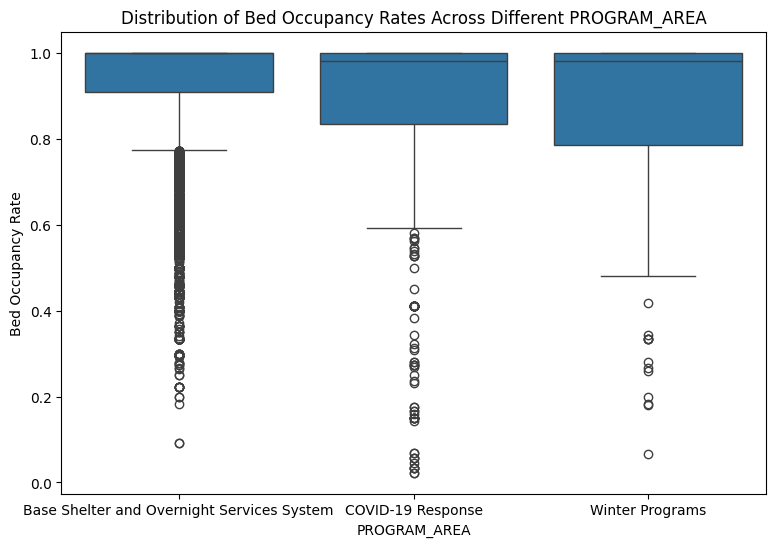

In [47]:
# Distribution of Bed Occupancy Rates across Different PROGRAM_AREA
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_df.dropna(subset=['OCCUPANCY_RATE_BED']), x='PROGRAM_AREA', y='OCCUPANCY_RATE_BED')
plt.title('Distribution of Bed Occupancy Rates Across Different PROGRAM_AREA')
plt.xlabel('PROGRAM_AREA')
plt.ylabel('Bed Occupancy Rate')

plt.show()

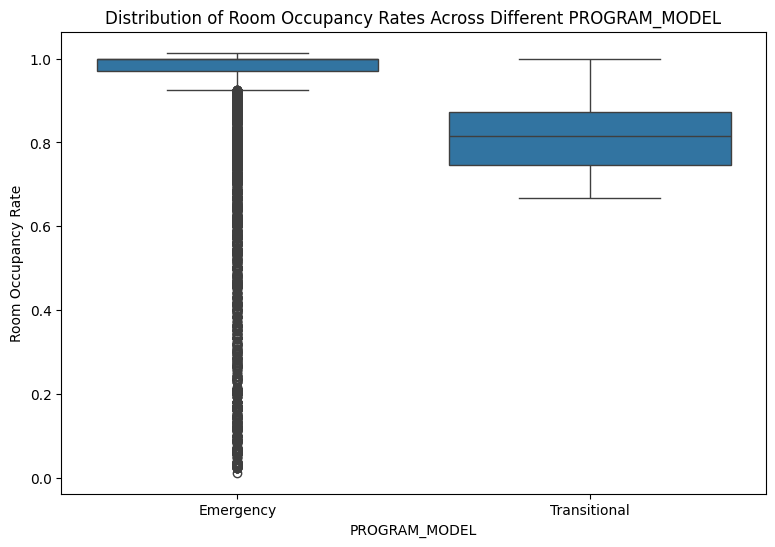

In [53]:
# Distribution of Room Occupancy Rates across Different Program Model
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_df.dropna(subset=['OCCUPANCY_RATE_ROOM']), x='PROGRAM_MODEL', y='OCCUPANCY_RATE_ROOM')
plt.title('Distribution of Room Occupancy Rates Across Different PROGRAM_MODEL')
plt.xlabel('PROGRAM_MODEL')
plt.ylabel('Room Occupancy Rate')

plt.show()

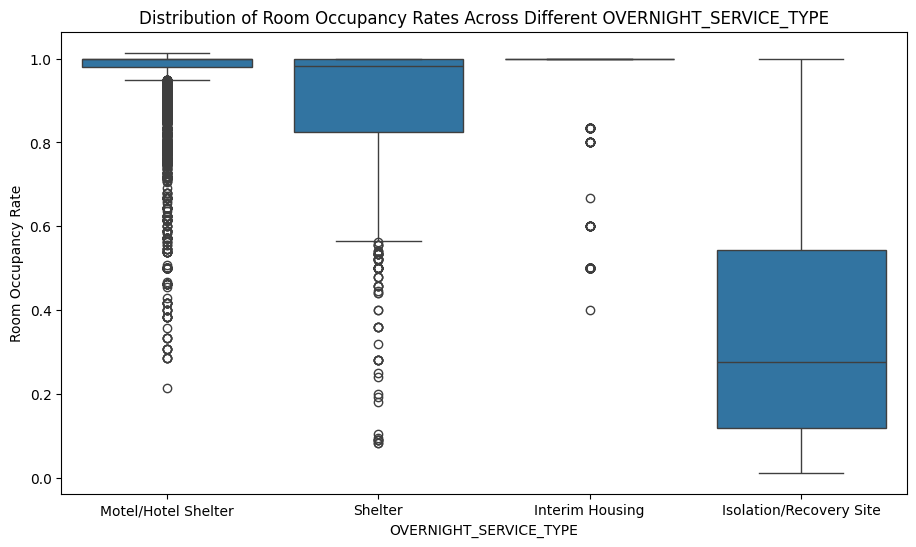

In [49]:
# Distribution of Room Occupancy Rates across Different OVERNIGHT_SERVICE_TYPE
plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_df.dropna(subset=['OCCUPANCY_RATE_ROOM']), x='OVERNIGHT_SERVICE_TYPE', y='OCCUPANCY_RATE_ROOM')
plt.title('Distribution of Room Occupancy Rates Across Different OVERNIGHT_SERVICE_TYPE')
plt.xlabel('OVERNIGHT_SERVICE_TYPE')
plt.ylabel('Room Occupancy Rate')

plt.show()


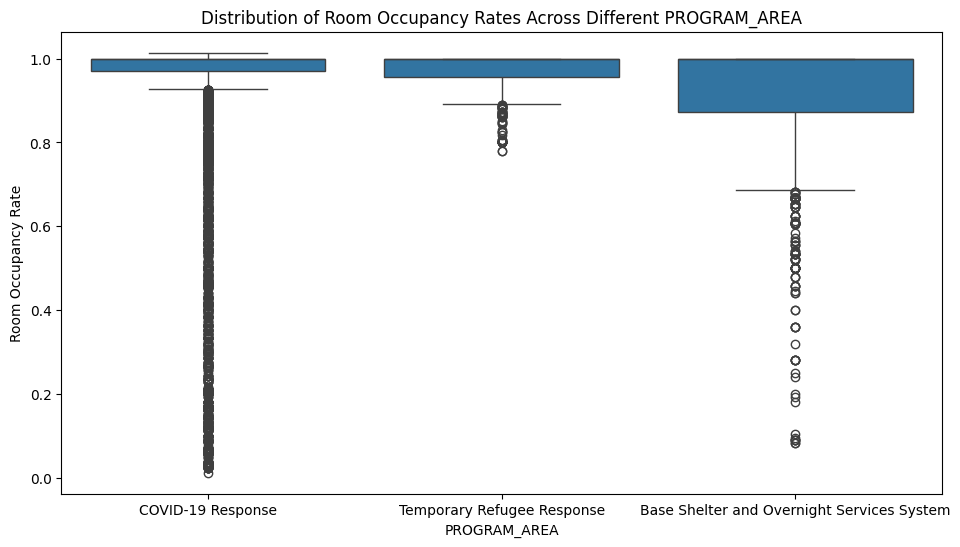

In [50]:
# Distribution of Room Occupancy Rates across Different PROGRAM_AREA
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_df.dropna(subset=['OCCUPANCY_RATE_ROOM']), x='PROGRAM_AREA', y='OCCUPANCY_RATE_ROOM')
plt.title('Distribution of Room Occupancy Rates Across Different PROGRAM_AREA')
plt.xlabel('PROGRAM_AREA')
plt.ylabel('Room Occupancy Rate')

plt.show()

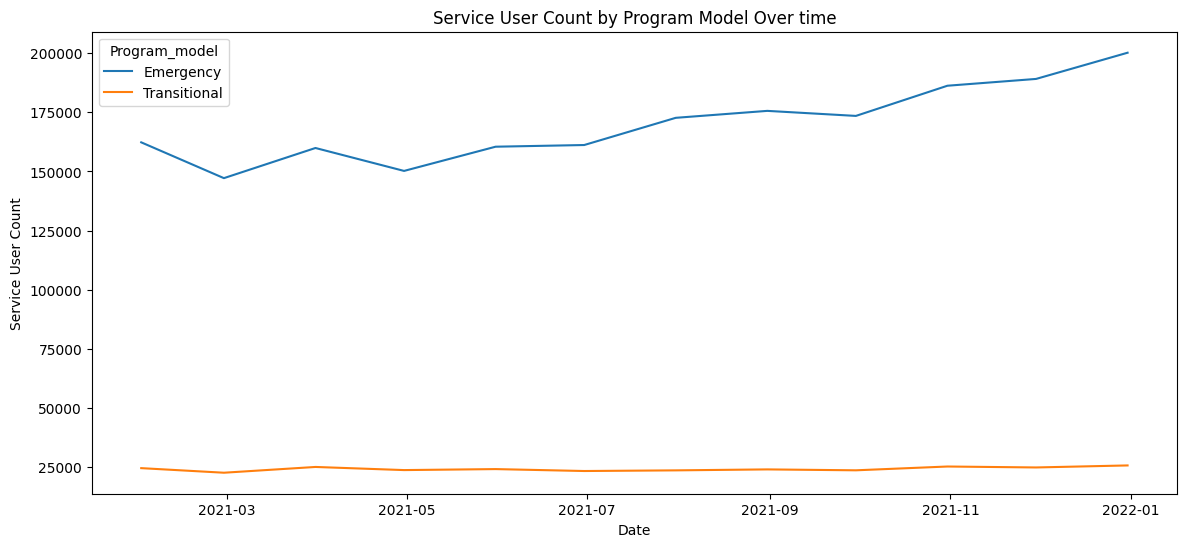

In [59]:
# Service User Count by Program model
sector_counts = cleaned_df.groupby(['PROGRAM_MODEL', pd.Grouper(key='OCCUPANCY_DATE', freq='M')])['SERVICE_USER_COUNT'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=sector_counts, x='OCCUPANCY_DATE', y='SERVICE_USER_COUNT', hue='PROGRAM_MODEL')
plt.title('Service User Count by Program Model Over time')
plt.xlabel('Date')
plt.ylabel('Service User Count')
plt.legend(title='Program_model',loc='upper left')

plt.show()

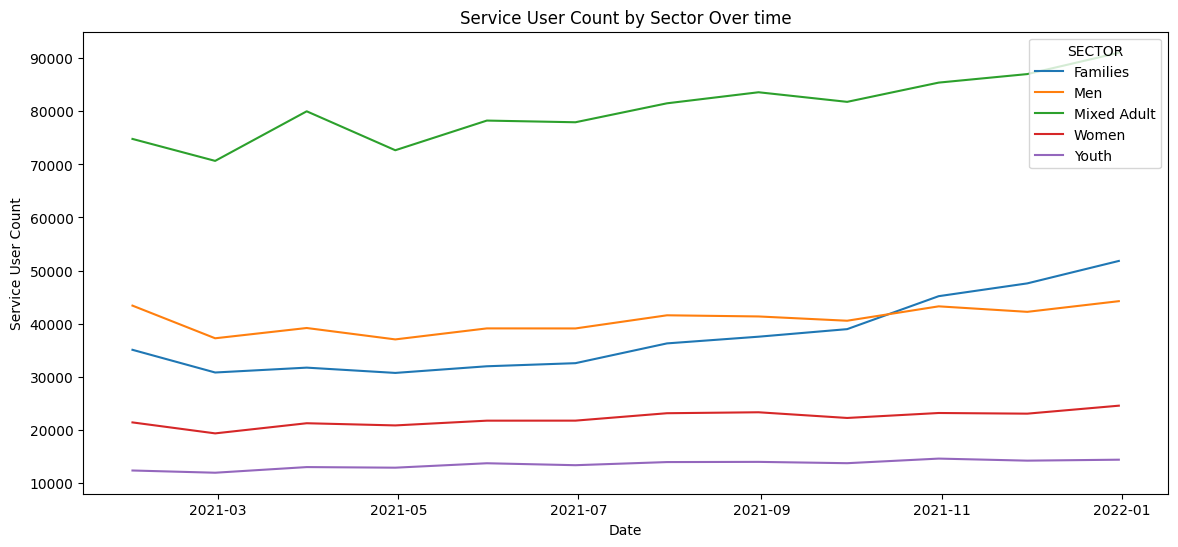

In [61]:
# Service User Count by Sector
sector_counts = cleaned_df.groupby(['SECTOR', pd.Grouper(key='OCCUPANCY_DATE', freq='M')])['SERVICE_USER_COUNT'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=sector_counts, x='OCCUPANCY_DATE', y='SERVICE_USER_COUNT', hue='SECTOR')
plt.title('Service User Count by Sector Over time')
plt.xlabel('Date')
plt.ylabel('Service User Count')
plt.legend(title='SECTOR')

plt.show()

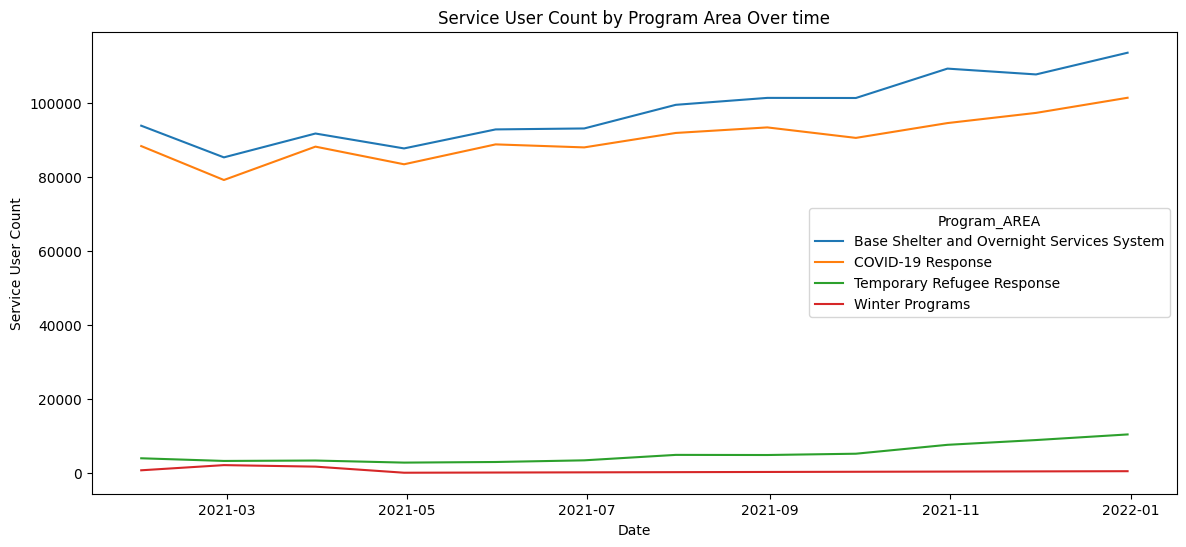

In [63]:
# Service User Count by Program Area
sector_counts = cleaned_df.groupby(['PROGRAM_AREA', pd.Grouper(key='OCCUPANCY_DATE', freq='M')])['SERVICE_USER_COUNT'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=sector_counts, x='OCCUPANCY_DATE', y='SERVICE_USER_COUNT', hue='PROGRAM_AREA')
plt.title('Service User Count by Program Area Over time')
plt.xlabel('Date')
plt.ylabel('Service User Count')
plt.legend(title='Program_AREA')

plt.show()

In [34]:
# Perform Two-Sample T-test of two different program
# Choose occupancy rate of bed over program model
model_1= cleaned_df[cleaned_df['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE_BED'].dropna()
model_2 = cleaned_df[cleaned_df['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE_BED'].dropna()

# Conduct the t-test between the two selected program models
t_stat, p_val = stats.ttest_ind(model_1, model_2)  # Assuming unequal variance
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))


t-statistic = 38.780694714817365
p-value = 0.0


In [35]:
# Perform Two-Sample T-test of two different program
# Choose occupancy rate of room over program model
model_3= cleaned_df[cleaned_df['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE_ROOM'].dropna()
model_4 = cleaned_df[cleaned_df['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE_ROOM'].dropna()

# Conduct the t-test between the two selected program models
t_stat, p_val = stats.ttest_ind(model_3, model_4)  # Assuming unequal variance
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 18.903262158430557
p-value = 5.923255977527666e-79
